# ガウス過程

In [1]:
import pymc3 as pm
import numpy as np 
import pandas as pd
import theano.tensor as tt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(["seaborn-colorblind", "seaborn-darkgrid"])
np.set_printoptions(precision=2)

<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject
/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_66008/2343375519.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-colorblind", "seaborn-darkgrid"])
/var/folders/zz/hwfwgc3s6wdfpwyj5z1s5y4m0000gn/T/ipykernel_66008/2343375519.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn-colorblind", "seaborn-darkgrid"])


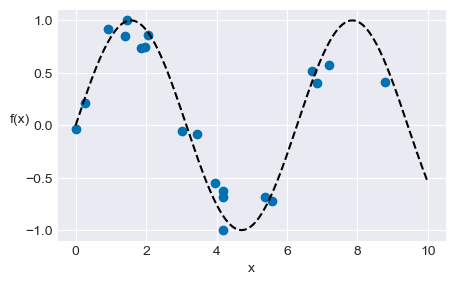

In [8]:
np.random.seed(1)
x = np.random.uniform(0, 10, size=20)
y = np.random.normal(np.sin(x), 0.2)
plt.figure(figsize=(5,3))
plt.plot(x, y, 'o')
true_x = np.linspace(0, 10, 200)
plt.plot(true_x, np.sin(true_x), 'k--')
plt.xlabel('x')
plt.ylabel('f(x)', rotation=0)
plt.savefig('img801.png')

In [11]:
# カーネル関数の定義
def gauss_kernel(x, n_knots):
    """
    Simple Gaussian radial kernel
    """
    knots = np.linspace(x.min(), x.max(), n_knots)
    w = 2

    return np.array([np.exp(-(x-k)**2/w) for k in knots])

In [12]:
n_knots = 5

with pm.Model() as kernel_model:
    gamma = pm.Cauchy("gamma", alpha=0, beta=1, shape=n_knots)
    sd = pm.Uniform("sd", 0, 10)
    mu = pm.math.dot(gamma, gauss_kernel(x, n_knots))
    yl = pm.Normal("yl", mu=mu, sigma=sd, observed=y)

    kernel_trace = pm.sample(5000)

az.plot_trace(kernel_trace)
plt.savefig("img802.png")

/Users/hiroakimatsumoto/miniforge3/envs/pymc3/lib/python3.10/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, gamma]
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary in

Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 8 seconds.


NameError: name 'az' is not defined

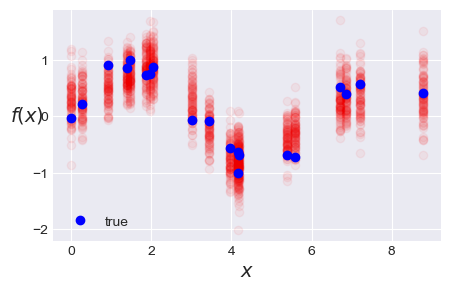

In [18]:
# 事後予測チェック
# ppc = pm.sample_ppc
ppc = pm.sample_posterior_predictive(kernel_trace, samples=100, model=kernel_model)
plt.figure(figsize=(5,3))
plt.plot(x, ppc["yl"].T, "ro", alpha=0.05)

plt.plot(x, y, "bo", label="true")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f(x)$", fontsize=14, rotation=0)
plt.legend()
plt.savefig("img803.png")

観測したデータ点以外のデータに対してモデルの振る舞いをチェックする

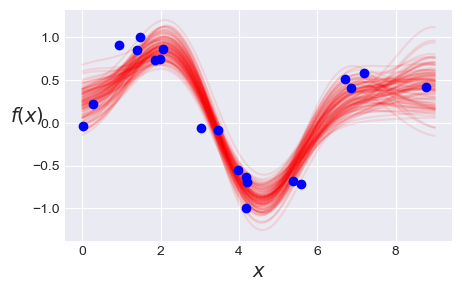

In [21]:
X_new = np.linspace(np.floor(x.min()), np.ceil(x.max()), 100)
k = gauss_kernel(X_new, n_knots=n_knots)
gamma_pred = kernel_trace["gamma"]

plt.figure(figsize=(5,3))
for i in range(100):
    idx = np.random.randint(0, len(gamma_pred))
    y_pred = np.dot(gamma_pred[idx], k)
    plt.plot(X_new, y_pred, "r-", alpha=0.1)
plt.plot(x, y, "bo")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$f(x)$", fontsize=14, rotation=0)
plt.savefig("img804.png")


帯域幅$w$やノット数'n_knots'を変更した場合の効果は章末演習１で。  
他のタイプの関数にフィットさせた効果は章末演習２で。